In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Load the data (replace with your file path)
file_path = "C:/Users/Alok Kumar Pandey/Downloads/Book1 final.xlsx"
data = pd.read_excel(file_path)

# Convert columns with string numbers to proper numeric values
data = data.replace(',', '.', regex=True)  # Replace commas with dots for decimal separation

# Defining the features (all columns except Leq) and target (Leq)
X = data.drop(columns=['Leq', 'L10', 'L50', 'L90', '%HT', 'Median width', 'Shoulder width',	'Temp.', 'RH',	'WS'])
y = data['Leq']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Calculate MSE, MAE, RMSE for Decision Tree
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)

# Feature importance for Decision Tree
feature_importance_dt = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=False)

print("Decision Tree Results:")
print(f"MSE: {mse_dt}, MAE: {mae_dt}, RMSE: {rmse_dt}")
print("Feature Importance (Decision Tree):")
print(feature_importance_dt)

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Calculate MSE, MAE, RMSE for Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

# Feature importance for Random Forest
feature_importance_rf = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

print("\nRandom Forest Results:")
print(f"MSE: {mse_rf}, MAE: {mae_rf}, RMSE: {rmse_rf}")
print("Feature Importance (Random Forest):")
print(feature_importance_rf)


Decision Tree Results:
MSE: 2.9521132118057962, MAE: 1.2349758367295751, RMSE: 1.718171473341877
Feature Importance (Decision Tree):
Heavy traffic    0.580614
Q1+Q2            0.214004
2w               0.059243
LCV              0.055901
Speed            0.047901
3w               0.022186
Car              0.020151
dtype: float64

Random Forest Results:
MSE: 1.0685669756195062, MAE: 0.8067827799643821, RMSE: 1.033715132722505
Feature Importance (Random Forest):
Heavy traffic    0.582166
Q1+Q2            0.145374
2w               0.074413
Car              0.063910
3w               0.058693
LCV              0.041092
Speed            0.034352
dtype: float64


In [2]:
data.head()

,Leq,L10,L50,L90,Q1+Q2,Speed,Car,2w,3w,LCV,Heavy traffic,%HT,Median width,Shoulder width,Temp.,RH,WS
0,72.582436,76.022919,66.560360,59.824617,480,61.808820,210,237,6,10,17,3.541667,4.3,2.2,22,50,11
1,72.725820,76.175759,67.382491,60.079635,467,59.440556,207,219,6,15,20,4.282655,4.3,2.2,22,51,12
2,72.576617,75.986391,67.378220,59.885639,468,60.354065,200,236,2,11,19,4.059829,4.3,2.2,23,52,13
3,72.097628,75.936159,67.202630,59.583686,537,63.814342,237,262,5,13,20,3.724395,4.3,2.2,24,53,14
4,72.446424,76.046587,67.348309,59.698275,547,67.122706,252,260,10,7,18,3.290676,4.3,2.2,25,54,15


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.inspection import permutation_importance

# Set random seeds for reproducibility
np.random.seed(42)  # For NumPy
tf.random.set_seed(42)  # For TensorFlow

# Load the data (replace with your file path)
file_path = "C:/Users/Alok Kumar Pandey/Downloads/Book1 final.xlsx"
data = pd.read_excel(file_path)

# Convert columns with string numbers to proper numeric values
data = data.replace(',', '.', regex=True)  # Replace commas with dots for decimal separation

# Defining the features (all columns except Leq) and target (Leq)
X = data.drop(columns=['Leq', 'L10', 'L50', 'L90', '%HT', 'Median width', 'Shoulder width',	'Temp.', 'RH',	'WS'])
y = data['Leq']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a simple ANN model
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[X_train_scaled.shape[1]]),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model with an optimizer and loss function
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=0)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate the MSE, MAE, and RMSE
mse_ann = mean_squared_error(y_test, y_pred)
mae_ann = mean_absolute_error(y_test, y_pred)
rmse_ann = np.sqrt(mse_ann)

print(f"ANN Results:\nMSE: {mse_ann}\nMAE: {mae_ann}\nRMSE: {rmse_ann}")

# Create a wrapper class for the Keras model to use with sklearn's permutation_importance
class KerasRegressorWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, model):
        self.model = model

    def fit(self, X, y, epochs=100, verbose=0):
        self.model.fit(X, y, epochs=epochs, verbose=verbose)
        return self

    def predict(self, X):
        return self.model.predict(X).flatten()

    def score(self, X, y):
        return -mean_squared_error(y, self.predict(X))  # Returning negative MSE as score

# Wrap the Keras model
wrapped_model = KerasRegressorWrapper(model)

# Fit the wrapped model
wrapped_model.fit(X_train_scaled, y_train)

# Apply permutation importance on the trained ANN model
perm_importance = permutation_importance(wrapped_model, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Displaying feature importances
feature_importances = pd.Series(perm_importance.importances_mean, index=X.columns).sort_values(ascending=False)
print("Feature Importances (Permutation Importance):")
print(feature_importances)


C:\Users\Alok Kumar Pandey\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
ANN Results:
MSE: 56.06361059624863
MAE: 5.114405470483189
RMSE: 7.487563729027529
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
3/3 ━━

C:\Users\Alok Kumar Pandey\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
ANN Results:
MSE: 23.708809886632064
MAE: 2.6902332606283386
RMSE: 4.869169322033489
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
3/3 

C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_10452\1995627533.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette="Purples")


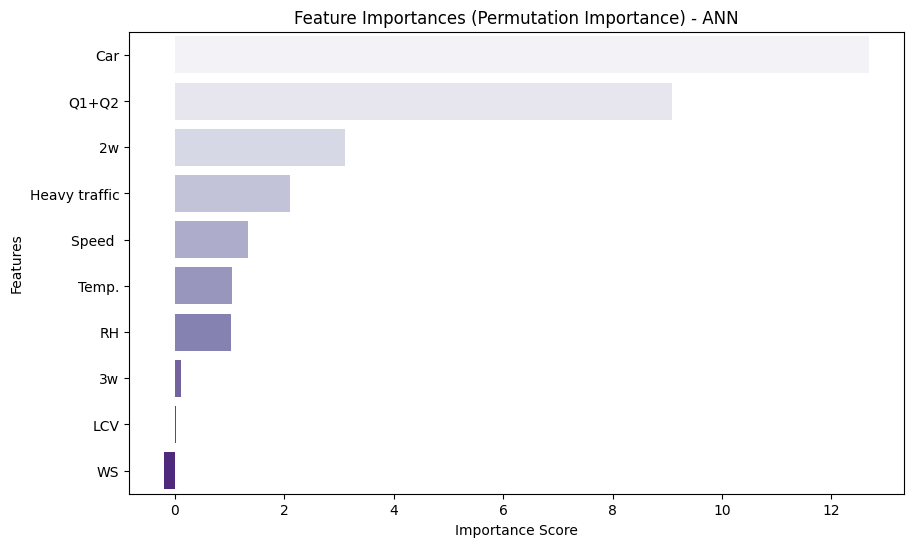

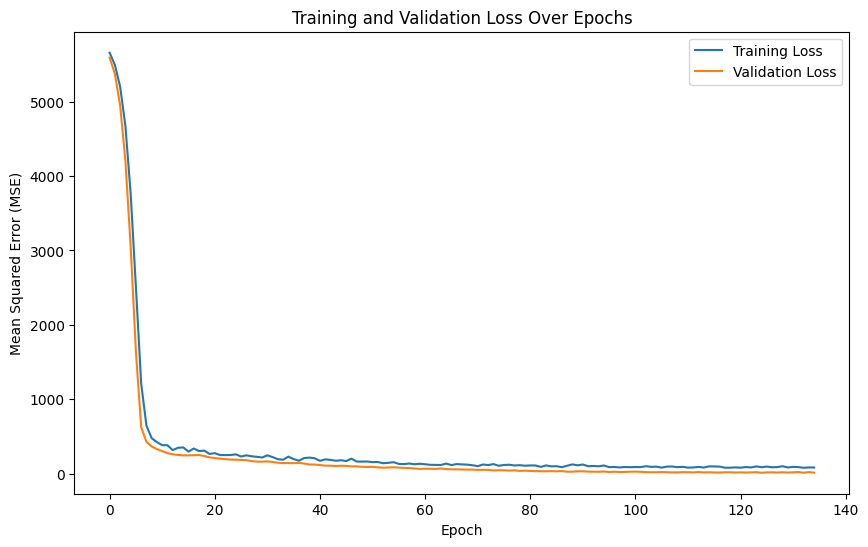

C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_10452\1995627533.py:130: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="black")  # Line of perfect prediction


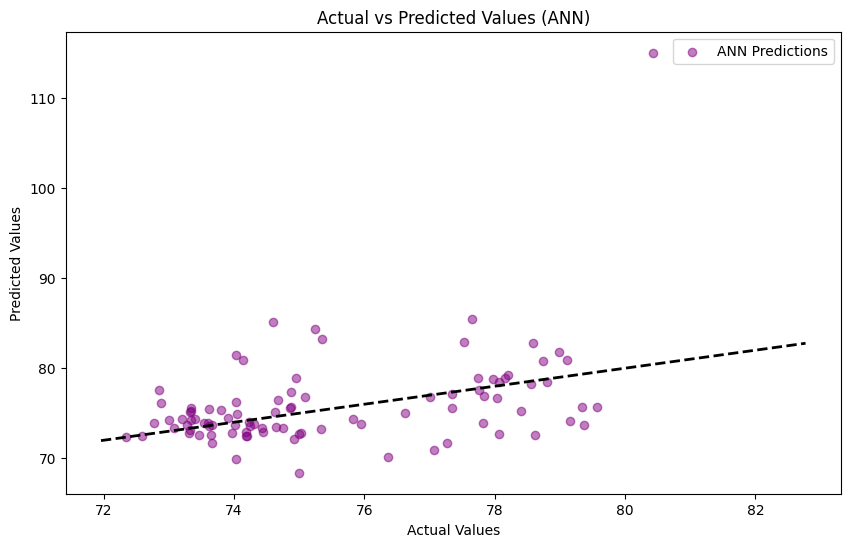

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.inspection import permutation_importance
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score


# Set random seeds for reproducibility
np.random.seed(42)  # For NumPy
tf.random.set_seed(42)  # For TensorFlow

# Load the data (replace with your file path)
file_path = "C:/Users/Alok Kumar Pandey/Downloads/Book1 final.xlsx"
data = pd.read_excel(file_path)

# Convert columns with string numbers to proper numeric values
data = data.replace(',', '.', regex=True)  # Replace commas with dots for decimal separation

# Defining the features (all columns except Leq) and target (Leq)
X = data.drop(columns=['Leq', 'L10', 'L50', 'L90', '%HT', 'Median width', 'Shoulder width'])
y = data['Leq']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a more complex ANN model with dropout
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[X_train_scaled.shape[1]]),  # More neurons
    layers.Dropout(0.3),  # Dropout to avoid overfitting
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model with a lower learning rate for Adam optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')

# Add early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_scaled, y_train, epochs=200, validation_split=0.2, callbacks=[early_stopping], verbose=0)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate the MSE, MAE, and RMSE
mse_ann = mean_squared_error(y_test, y_pred)
mae_ann = mean_absolute_error(y_test, y_pred)
rmse_ann = np.sqrt(mse_ann)

print(f"ANN Results:\nMSE: {mse_ann}\nMAE: {mae_ann}\nRMSE: {rmse_ann}")

# Create a wrapper class for the Keras model to use with sklearn's permutation_importance
class KerasRegressorWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, model):
        self.model = model

    def fit(self, X, y, epochs=100, verbose=0):
        self.model.fit(X, y, epochs=epochs, verbose=verbose)
        return self

    def predict(self, X):
        return self.model.predict(X).flatten()

    def score(self, X, y):
        return -mean_squared_error(y, self.predict(X))  # Returning negative MSE as score

# Wrap the Keras model
wrapped_model = KerasRegressorWrapper(model)

# Fit the wrapped model
wrapped_model.fit(X_train_scaled, y_train)

# Apply permutation importance on the trained ANN model
perm_importance = permutation_importance(wrapped_model, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Displaying feature importances
feature_importances = pd.Series(perm_importance.importances_mean, index=X.columns).sort_values(ascending=False)
print("Feature Importances (Permutation Importance):")
print(feature_importances)

# Calculate R² (Accuracy) for ANN
r2_ann = r2_score(y_test, y_pred)

print(f"ANN Results:\nMSE: {mse_ann}\nMAE: {mae_ann}\nRMSE: {rmse_ann}\nR²: {r2_ann}")

import matplotlib.pyplot as plt
import seaborn as sns

# ----------------- Feature Importance Plot ----------------- #

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette="Purples")
plt.title("Feature Importances (Permutation Importance) - ANN")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# ----------------- Training History Plot ----------------- #

# Plot training and validation loss history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training and Validation Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend()
plt.show()


# ----------------- Actual vs Predicted Plot ----------------- #

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="purple", label="ANN Predictions")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="black")  # Line of perfect prediction
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (ANN)")
plt.legend()
plt.show()


Decision Tree Results:
MSE: 3.854966834621725, MAE: 1.4721713297316157, RMSE: 1.9634069457506065
Feature Importance (Decision Tree):
Heavy traffic    0.570162
Temp.            0.128629
Q1+Q2            0.088020
LCV              0.048494
Speed            0.040031
2w               0.039516
3w               0.037552
Car              0.032420
RH               0.007635
WS               0.007541
dtype: float64

Random Forest Results:
MSE: 1.0870838451828373, MAE: 0.8210089546549616, RMSE: 1.0426331306758083
Feature Importance (Random Forest):
Heavy traffic    0.576382
Q1+Q2            0.117500
Temp.            0.061580
Car              0.056423
3w               0.052583
2w               0.050849
LCV              0.034931
Speed            0.027639
RH               0.012894
WS               0.009219
dtype: float64

Accuracy (R² Scores):
Decision Tree R²: 0.14962106527070795
Random Forest R²: 0.7601968468507679


C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_10452\2150068556.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_dt, y=feature_importance_dt.index, palette="Blues")


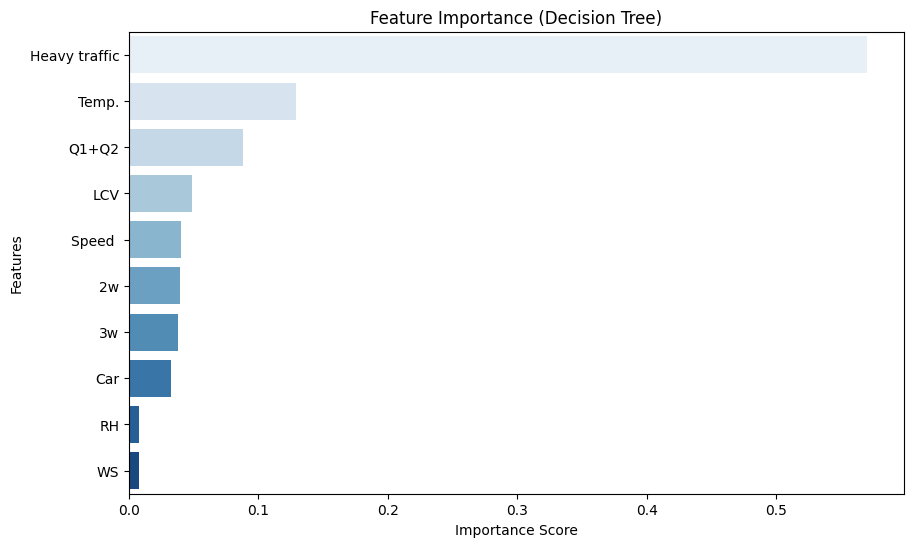

C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_10452\2150068556.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_rf, y=feature_importance_rf.index, palette="Greens")


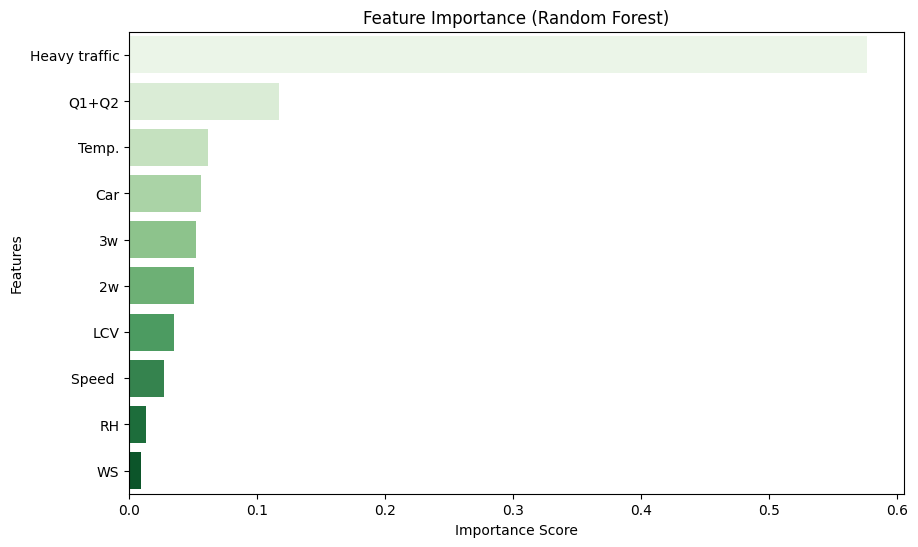

C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_10452\2150068556.py:99: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="black")  # Line of perfect prediction


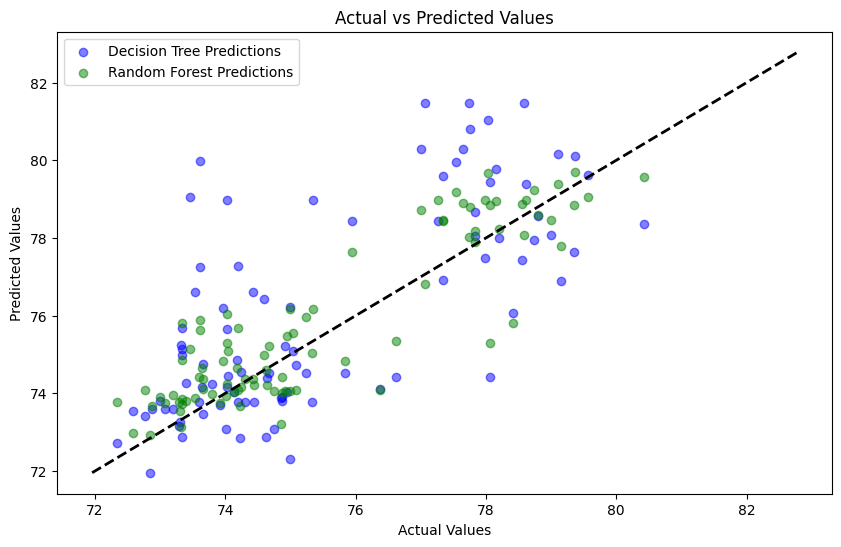

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.metrics import r2_score

# Load the data (replace with your file path)
file_path = "C:/Users/Alok Kumar Pandey/Downloads/Book1 final.xlsx"
data = pd.read_excel(file_path)

# Convert columns with string numbers to proper numeric values
data = data.replace(',', '.', regex=True)  # Replace commas with dots for decimal separation


# Defining the features (all columns except Leq) and target (Leq)
X = data.drop(columns=['Leq', 'L10', 'L50', 'L90', '%HT', 'Median width', 'Shoulder width'])
y = data['Leq']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Calculate MSE, MAE, RMSE for Decision Tree
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)

# Feature importance for Decision Tree
feature_importance_dt = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=False)

print("Decision Tree Results:")
print(f"MSE: {mse_dt}, MAE: {mae_dt}, RMSE: {rmse_dt}")
print("Feature Importance (Decision Tree):")
print(feature_importance_dt)

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Calculate MSE, MAE, RMSE for Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

# Feature importance for Random Forest
feature_importance_rf = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

print("\nRandom Forest Results:")
print(f"MSE: {mse_rf}, MAE: {mae_rf}, RMSE: {rmse_rf}")
print("Feature Importance (Random Forest):")
print(feature_importance_rf)

# Calculate R² (Accuracy) for Decision Tree
r2_dt = r2_score(y_test, y_pred_dt)

# Calculate R² (Accuracy) for Random Forest
r2_rf = r2_score(y_test, y_pred_rf)

print("\nAccuracy (R² Scores):")
print(f"Decision Tree R²: {r2_dt}")
print(f"Random Forest R²: {r2_rf}")

# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------- Decision Tree Feature Importance Plot ----------------- #

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_dt, y=feature_importance_dt.index, palette="Blues")
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# ----------------- Random Forest Feature Importance Plot ----------------- #

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_rf, y=feature_importance_rf.index, palette="Greens")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


# ----------------- Actual vs Predicted Plot ----------------- #

# Plot Actual vs Predicted for both models
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, color="blue", alpha=0.5, label="Decision Tree Predictions")
plt.scatter(y_test, y_pred_rf, color="green", alpha=0.5, label="Random Forest Predictions")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="black")  # Line of perfect prediction
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()



XGBoost Results:
MSE: 1.2192983445930445, MAE: 0.8271794210231174, RMSE: 1.1042184315582875
Feature Importance (XGBoost):
Heavy traffic    0.614659
3w               0.089922
Q1+Q2            0.082553
2w               0.059403
LCV              0.057754
Car              0.023314
Temp.            0.023229
RH               0.018648
Speed            0.016806
WS               0.013712
dtype: float32

SVM Results:
MSE: 1.1086311877476833, MAE: 0.8319353810963537, RMSE: 1.0529155653459035
Feature Importance (SVM):
Heavy traffic    1.183456
Car              0.828051
2w               0.390400
LCV              0.214366
3w               0.193262
RH               0.147358
Q1+Q2            0.135671
WS               0.076870
Speed            0.062073
Temp.            0.028542
dtype: float64

Accuracy (R² Scores):
XGBoost R²: 0.7310312456957968
SVM R²: 0.7554436525944705


C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_10452\3380351579.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_xgb, y=feature_importance_xgb.index, palette="viridis")


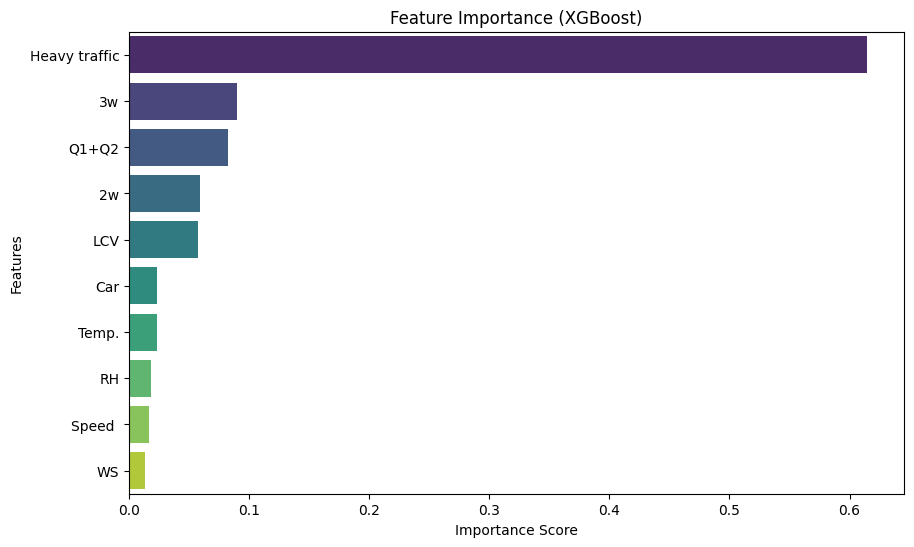

C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_10452\3380351579.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_svm, y=feature_importance_svm.index, palette="magma")


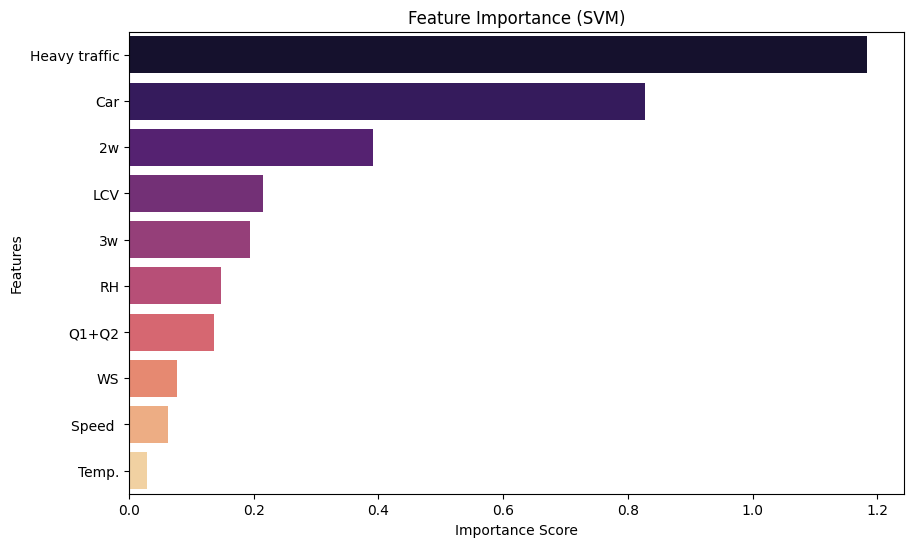

C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_10452\3380351579.py:110: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="black")  # Line of perfect prediction


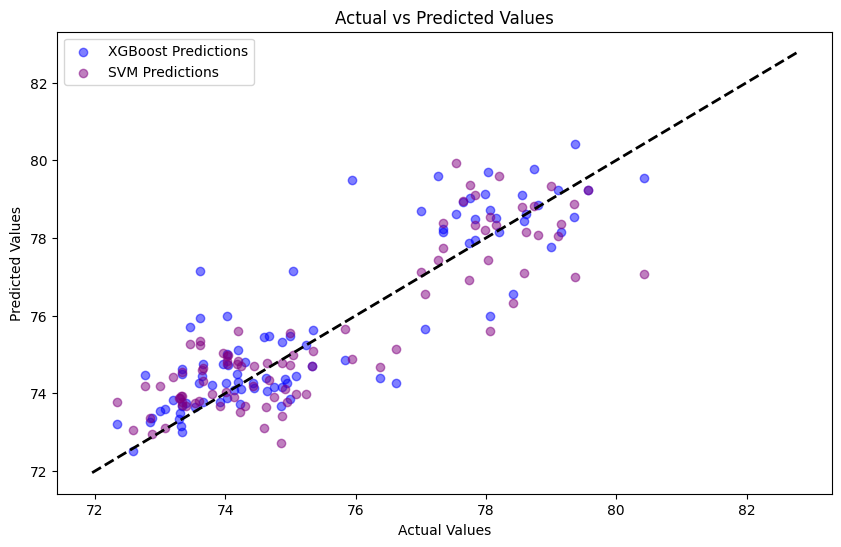

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (replace with your file path)
file_path = "C:/Users/Alok Kumar Pandey/Downloads/Book1 final.xlsx"
data = pd.read_excel(file_path)

# Convert columns with string numbers to proper numeric values
data = data.replace(',', '.', regex=True)  # Replace commas with dots for decimal separation
data = data.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, replace invalid entries with NaN

# Drop rows with NaN values (if any exist after conversion)
data = data.dropna()

# Define features (X) and target (y)
X = data.drop(columns=['Leq', 'L10', 'L50', 'L90', '%HT', 'Median width', 'Shoulder width'])
y = data['Leq']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------- XGBoost Regressor ----------------- #

# Initialize and train the XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Calculate MSE, MAE, RMSE for XGBoost
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

# Feature importance for XGBoost
feature_importance_xgb = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)

print("\nXGBoost Results:")
print(f"MSE: {mse_xgb}, MAE: {mae_xgb}, RMSE: {rmse_xgb}")
print("Feature Importance (XGBoost):")
print(feature_importance_xgb)

# ----------------- SVM Regressor ----------------- #

# Standardize the data for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVM model with a linear kernel
svm_model = SVR(kernel='linear')
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

# Calculate MSE, MAE, RMSE for SVM
mse_svm = mean_squared_error(y_test, y_pred_svm)
mae_svm = mean_absolute_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)

# Feature importance for SVM (absolute values of coefficients)
feature_importance_svm = pd.Series(abs(svm_model.coef_[0]), index=X.columns).sort_values(ascending=False)

print("\nSVM Results:")
print(f"MSE: {mse_svm}, MAE: {mae_svm}, RMSE: {rmse_svm}")
print("Feature Importance (SVM):")
print(feature_importance_svm)

# Calculate R² (Accuracy) for XGBoost
r2_xgb = r2_score(y_test, y_pred_xgb)

# Calculate R² (Accuracy) for SVM
r2_svm = r2_score(y_test, y_pred_svm)

print("\nAccuracy (R² Scores):")
print(f"XGBoost R²: {r2_xgb}")
print(f"SVM R²: {r2_svm}")

# ----------------- Visualization ----------------- #

# ----------------- XGBoost Feature Importance Plot ----------------- #
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_xgb, y=feature_importance_xgb.index, palette="viridis")
plt.title("Feature Importance (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# ----------------- SVM Feature Importance Plot ----------------- #
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_svm, y=feature_importance_svm.index, palette="magma")
plt.title("Feature Importance (SVM)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# ----------------- Actual vs Predicted Plot ----------------- #
# Plot Actual vs Predicted for both models
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, color="blue", alpha=0.5, label="XGBoost Predictions")
plt.scatter(y_test, y_pred_svm, color="purple", alpha=0.5, label="SVM Predictions")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="black")  # Line of perfect prediction
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()


C:\Users\Alok Kumar Pandey\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
ANN Results:
MSE: 15.470743284190583
MAE: 2.1796757092965624
RMSE: 3.933286575396024
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
3/3

C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_10452\1796496133.py:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette="Purples")


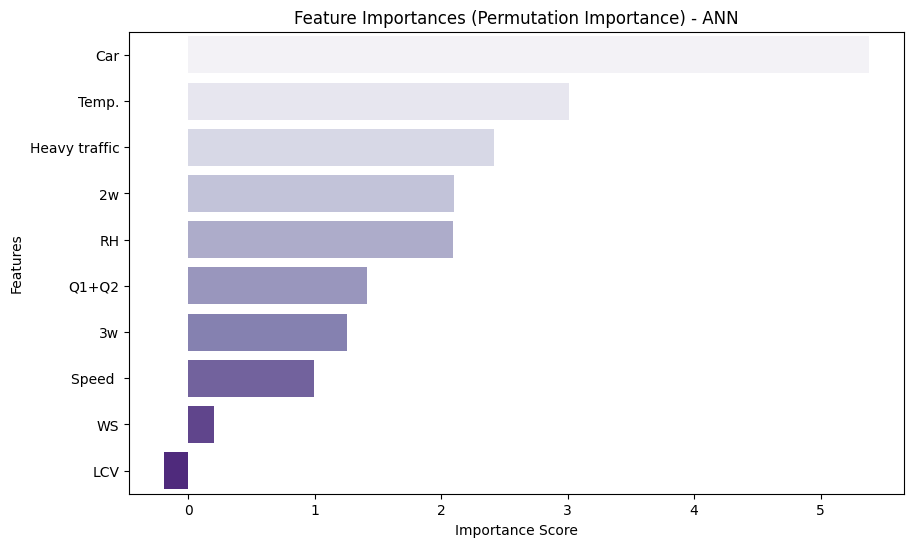

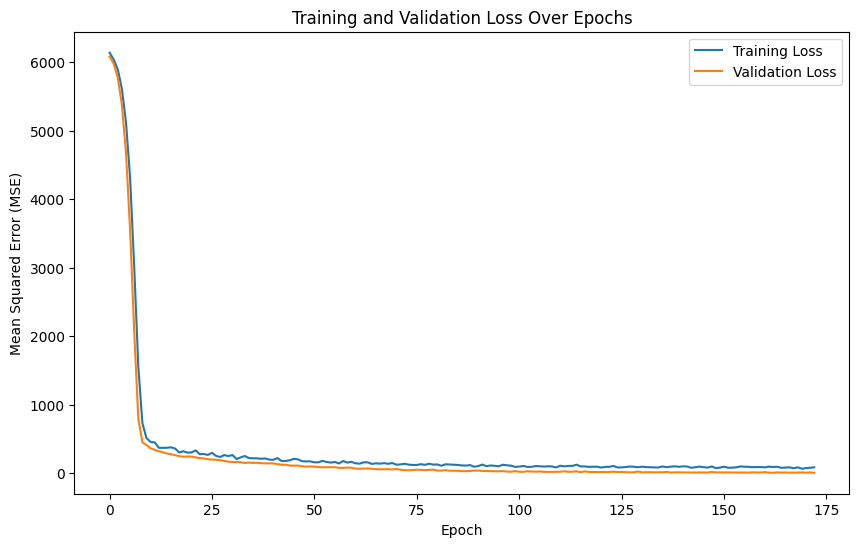

C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_10452\1796496133.py:129: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="black")  # Line of perfect prediction


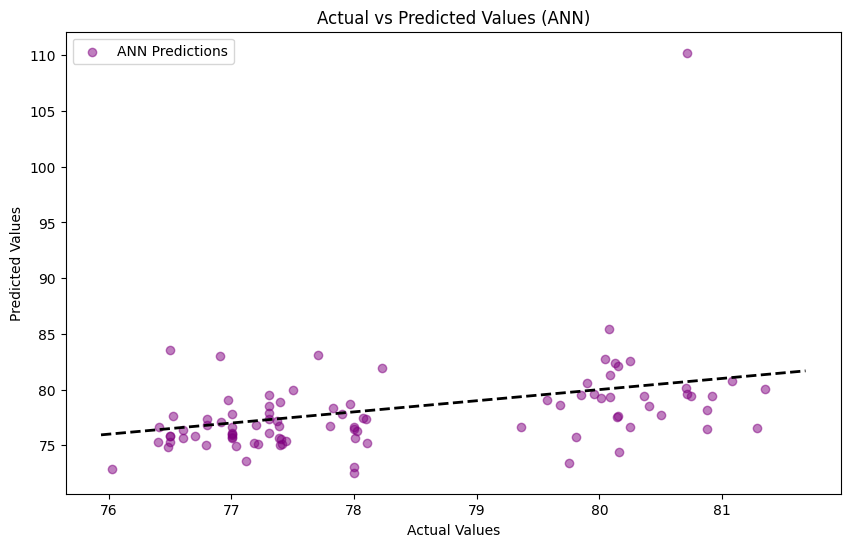

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.inspection import permutation_importance
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score

# Set random seeds for reproducibility
np.random.seed(42)  # For NumPy
tf.random.set_seed(42)  # For TensorFlow

# Load the data (replace with your file path)
file_path = "C:/Users/Alok Kumar Pandey/Downloads/Book1 final.xlsx"
data = pd.read_excel(file_path)

# Convert columns with string numbers to proper numeric values
data = data.replace(',', '.', regex=True)  # Replace commas with dots for decimal separation

# Defining the features (all columns except Leq) and target (Leq)
X = data.drop(columns=['Leq', 'L10', 'L50', 'L90', '%HT', 'Median width', 'Shoulder width'])
y = data['L10']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a more complex ANN model with dropout
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[X_train_scaled.shape[1]]),  # More neurons
    layers.Dropout(0.3),  # Dropout to avoid overfitting
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model with a lower learning rate for Adam optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')

# Add early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_scaled, y_train, epochs=200, validation_split=0.2, callbacks=[early_stopping], verbose=0)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate the MSE, MAE, and RMSE
mse_ann = mean_squared_error(y_test, y_pred)
mae_ann = mean_absolute_error(y_test, y_pred)
rmse_ann = np.sqrt(mse_ann)

print(f"ANN Results:\nMSE: {mse_ann}\nMAE: {mae_ann}\nRMSE: {rmse_ann}")

# Create a wrapper class for the Keras model to use with sklearn's permutation_importance
class KerasRegressorWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, model):
        self.model = model

    def fit(self, X, y, epochs=100, verbose=0):
        self.model.fit(X, y, epochs=epochs, verbose=verbose)
        return self

    def predict(self, X):
        return self.model.predict(X).flatten()

    def score(self, X, y):
        return -mean_squared_error(y, self.predict(X))  # Returning negative MSE as score

# Wrap the Keras model
wrapped_model = KerasRegressorWrapper(model)

# Fit the wrapped model
wrapped_model.fit(X_train_scaled, y_train)

# Apply permutation importance on the trained ANN model
perm_importance = permutation_importance(wrapped_model, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Displaying feature importances
feature_importances = pd.Series(perm_importance.importances_mean, index=X.columns).sort_values(ascending=False)
print("Feature Importances (Permutation Importance):")
print(feature_importances)

# Calculate R² (Accuracy) for ANN
r2_ann = r2_score(y_test, y_pred)

print(f"ANN Results:\nMSE: {mse_ann}\nMAE: {mae_ann}\nRMSE: {rmse_ann}\nR²: {r2_ann}")

import matplotlib.pyplot as plt
import seaborn as sns

# ----------------- Feature Importance Plot ----------------- #

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette="Purples")
plt.title("Feature Importances (Permutation Importance) - ANN")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# ----------------- Training History Plot ----------------- #

# Plot training and validation loss history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training and Validation Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend()
plt.show()


# ----------------- Actual vs Predicted Plot ----------------- #

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="purple", label="ANN Predictions")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="black")  # Line of perfect prediction
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (ANN)")
plt.legend()
plt.show()


C:\Users\Alok Kumar Pandey\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
ANN Results:
MSE: 11.757889709779702
MAE: 2.0650463812560518
RMSE: 3.42897793952946
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89us/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
3/3

C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_10452\2216521378.py:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette="Purples")


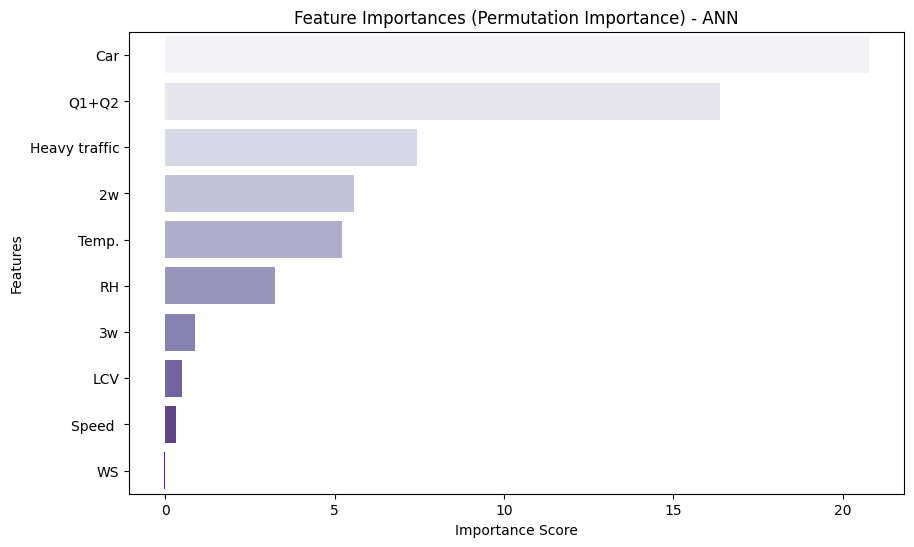

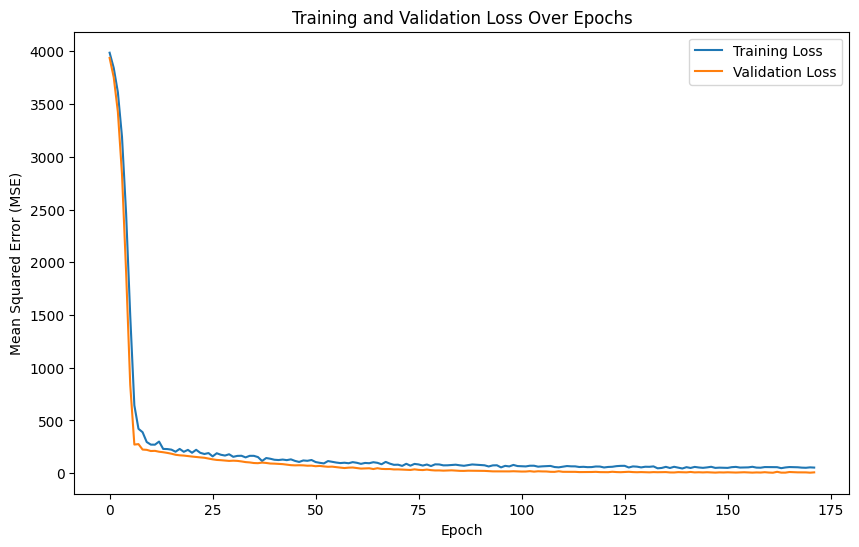

C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_10452\2216521378.py:129: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="black")  # Line of perfect prediction


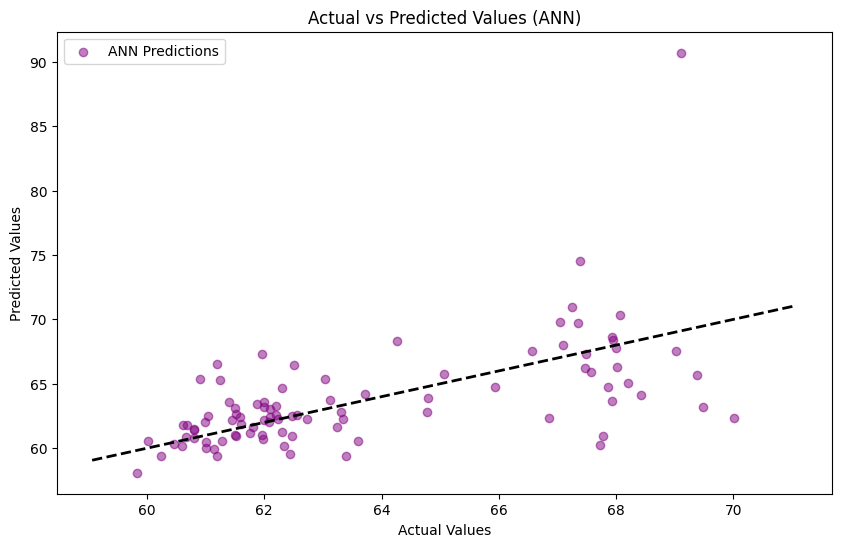

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.inspection import permutation_importance
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score

# Set random seeds for reproducibility
np.random.seed(42)  # For NumPy
tf.random.set_seed(42)  # For TensorFlow

# Load the data (replace with your file path)
file_path = "C:/Users/Alok Kumar Pandey/Downloads/Book1 final.xlsx"
data = pd.read_excel(file_path)

# Convert columns with string numbers to proper numeric values
data = data.replace(',', '.', regex=True)  # Replace commas with dots for decimal separation

# Defining the features (all columns except Leq) and target (Leq)
X = data.drop(columns=['Leq', 'L10', 'L50', 'L90', '%HT', 'Median width', 'Shoulder width'])
y = data['L90']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a more complex ANN model with dropout
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[X_train_scaled.shape[1]]),  # More neurons
    layers.Dropout(0.3),  # Dropout to avoid overfitting
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model with a lower learning rate for Adam optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')

# Add early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_scaled, y_train, epochs=200, validation_split=0.2, callbacks=[early_stopping], verbose=0)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate the MSE, MAE, and RMSE
mse_ann = mean_squared_error(y_test, y_pred)
mae_ann = mean_absolute_error(y_test, y_pred)
rmse_ann = np.sqrt(mse_ann)

print(f"ANN Results:\nMSE: {mse_ann}\nMAE: {mae_ann}\nRMSE: {rmse_ann}")

# Create a wrapper class for the Keras model to use with sklearn's permutation_importance
class KerasRegressorWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, model):
        self.model = model

    def fit(self, X, y, epochs=100, verbose=0):
        self.model.fit(X, y, epochs=epochs, verbose=verbose)
        return self

    def predict(self, X):
        return self.model.predict(X).flatten()

    def score(self, X, y):
        return -mean_squared_error(y, self.predict(X))  # Returning negative MSE as score

# Wrap the Keras model
wrapped_model = KerasRegressorWrapper(model)

# Fit the wrapped model
wrapped_model.fit(X_train_scaled, y_train)

# Apply permutation importance on the trained ANN model
perm_importance = permutation_importance(wrapped_model, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Displaying feature importances
feature_importances = pd.Series(perm_importance.importances_mean, index=X.columns).sort_values(ascending=False)
print("Feature Importances (Permutation Importance):")
print(feature_importances)

# Calculate R² (Accuracy) for ANN
r2_ann = r2_score(y_test, y_pred)

print(f"ANN Results:\nMSE: {mse_ann}\nMAE: {mae_ann}\nRMSE: {rmse_ann}\nR²: {r2_ann}")

import matplotlib.pyplot as plt
import seaborn as sns

# ----------------- Feature Importance Plot ----------------- #

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette="Purples")
plt.title("Feature Importances (Permutation Importance) - ANN")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# ----------------- Training History Plot ----------------- #

# Plot training and validation loss history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training and Validation Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend()
plt.show()


# ----------------- Actual vs Predicted Plot ----------------- #

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="purple", label="ANN Predictions")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="black")  # Line of perfect prediction
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (ANN)")
plt.legend()
plt.show()


Decision Tree Results:
MSE: 0.6683145943486272, MAE: 0.48894152448340755, RMSE: 0.8175051035612115
Feature Importance (Decision Tree):
Heavy traffic    0.635165
Q1+Q2            0.222303
2w               0.043436
Car              0.027873
3w               0.020632
RH               0.018280
WS               0.011330
Temp.            0.010944
LCV              0.005066
Speed            0.004971
dtype: float64

Random Forest Results:
MSE: 0.3712672742493403, MAE: 0.3994433973050344, RMSE: 0.6093170556035177
Feature Importance (Random Forest):
Heavy traffic    0.647442
Q1+Q2            0.131906
2w               0.056785
Temp.            0.045240
Car              0.041781
3w               0.026745
RH               0.014367
LCV              0.013231
Speed            0.012029
WS               0.010472
dtype: float64

Accuracy (R² Scores):
Decision Tree R²: 0.7262392560709477
Random Forest R²: 0.8479183216190681


C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_10452\2814507372.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_dt, y=feature_importance_dt.index, palette="Blues")


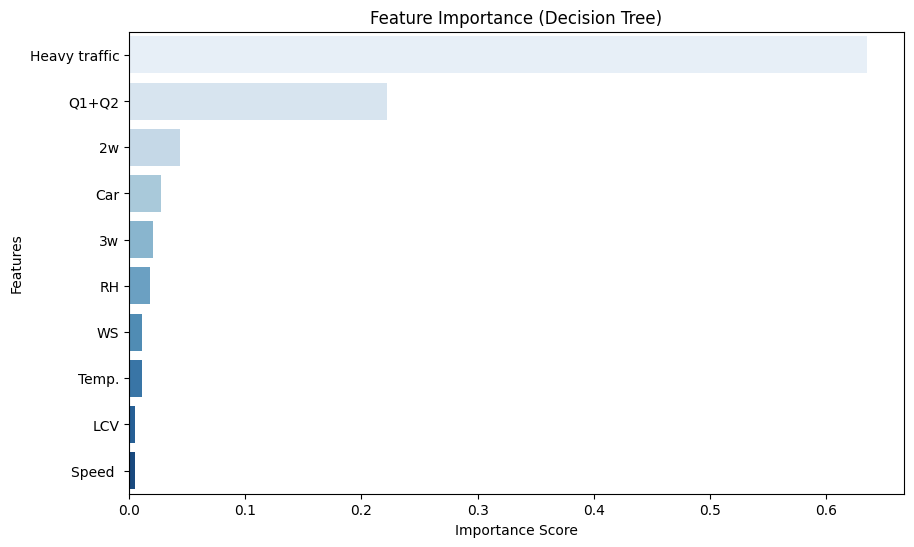

C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_10452\2814507372.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_rf, y=feature_importance_rf.index, palette="Greens")


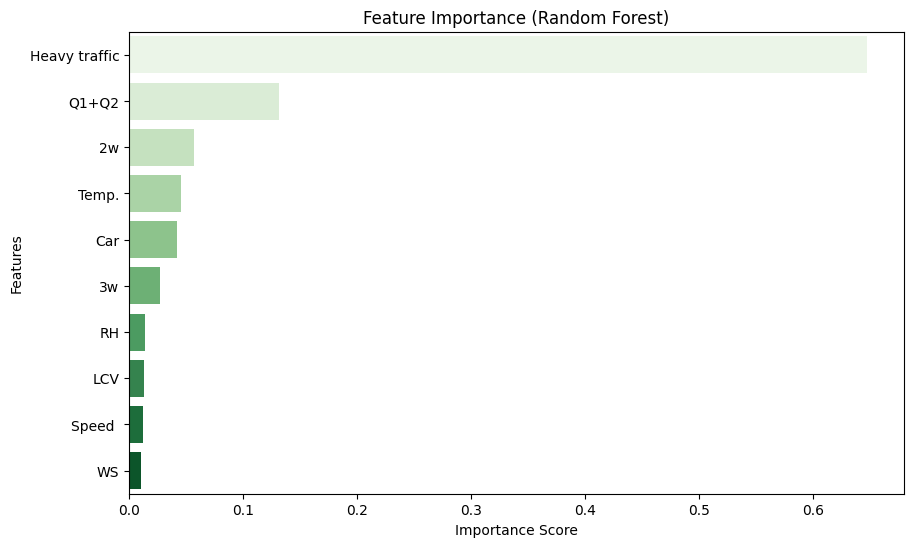

C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_10452\2814507372.py:100: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="black")  # Line of perfect prediction


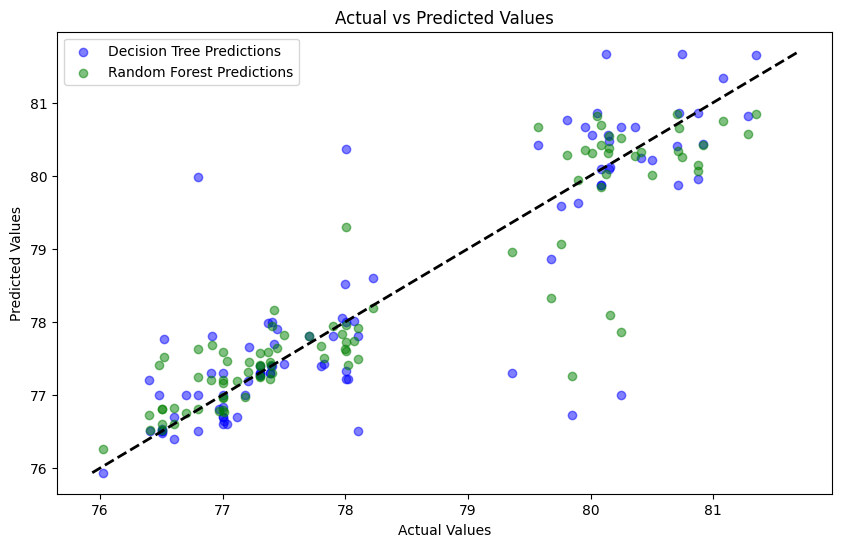

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.metrics import r2_score

# Load the data (replace with your file path)
file_path = "C:/Users/Alok Kumar Pandey/Downloads/Book1 final.xlsx"
data = pd.read_excel(file_path)

# Convert columns with string numbers to proper numeric values
data = data.replace(',', '.', regex=True)  # Replace commas with dots for decimal separation


# Defining the features (all columns except Leq) and target (Leq)
X = data.drop(columns=['Leq', 'L10', 'L50', 'L90', '%HT', 'Median width', 'Shoulder width'])
y = data['L10']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Calculate MSE, MAE, RMSE for Decision Tree
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)

# Feature importance for Decision Tree
feature_importance_dt = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=False)

print("Decision Tree Results:")
print(f"MSE: {mse_dt}, MAE: {mae_dt}, RMSE: {rmse_dt}")
print("Feature Importance (Decision Tree):")
print(feature_importance_dt)

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Calculate MSE, MAE, RMSE for Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

# Feature importance for Random Forest
feature_importance_rf = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

print("\nRandom Forest Results:")
print(f"MSE: {mse_rf}, MAE: {mae_rf}, RMSE: {rmse_rf}")
print("Feature Importance (Random Forest):")
print(feature_importance_rf)

# Calculate R² (Accuracy) for Decision Tree
r2_dt = r2_score(y_test, y_pred_dt)

# Calculate R² (Accuracy) for Random Forest
r2_rf = r2_score(y_test, y_pred_rf)

print("\nAccuracy (R² Scores):")
print(f"Decision Tree R²: {r2_dt}")
print(f"Random Forest R²: {r2_rf}")


# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------- Decision Tree Feature Importance Plot ----------------- #

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_dt, y=feature_importance_dt.index, palette="Blues")
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# ----------------- Random Forest Feature Importance Plot ----------------- #

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_rf, y=feature_importance_rf.index, palette="Greens")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


# ----------------- Actual vs Predicted Plot ----------------- #

# Plot Actual vs Predicted for both models
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, color="blue", alpha=0.5, label="Decision Tree Predictions")
plt.scatter(y_test, y_pred_rf, color="green", alpha=0.5, label="Random Forest Predictions")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="black")  # Line of perfect prediction
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()


Decision Tree Results:
MSE: 2.5309306701352967, MAE: 0.8785912763166346, RMSE: 1.5908898988098759
Feature Importance (Decision Tree):
Heavy traffic    0.612227
Q1+Q2            0.229926
3w               0.059679
RH               0.033085
Temp.            0.017936
Car              0.013950
2w               0.013341
Speed            0.007524
LCV              0.006520
WS               0.005811
dtype: float64

Random Forest Results:
MSE: 1.3253778493464992, MAE: 0.7310548744089999, RMSE: 1.151250558890852
Feature Importance (Random Forest):
Heavy traffic    0.614935
Q1+Q2            0.147174
Car              0.079032
3w               0.034603
Temp.            0.029136
2w               0.027803
RH               0.026362
LCV              0.022413
Speed            0.010329
WS               0.008213
dtype: float64

Accuracy (R² Scores):
Decision Tree R²: 0.7004119183130546
Random Forest R²: 0.843114071799185


C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_10452\2713558836.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_dt, y=feature_importance_dt.index, palette="Blues")


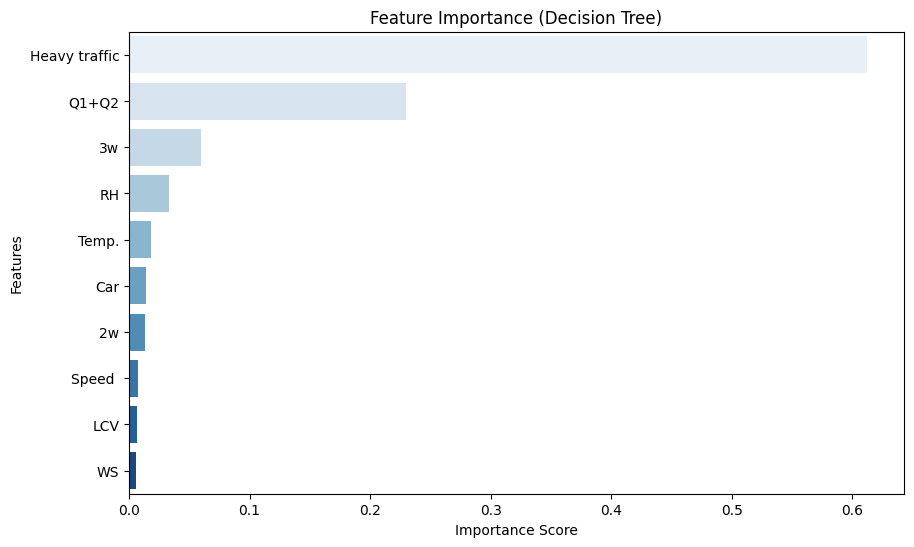

C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_10452\2713558836.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_rf, y=feature_importance_rf.index, palette="Greens")


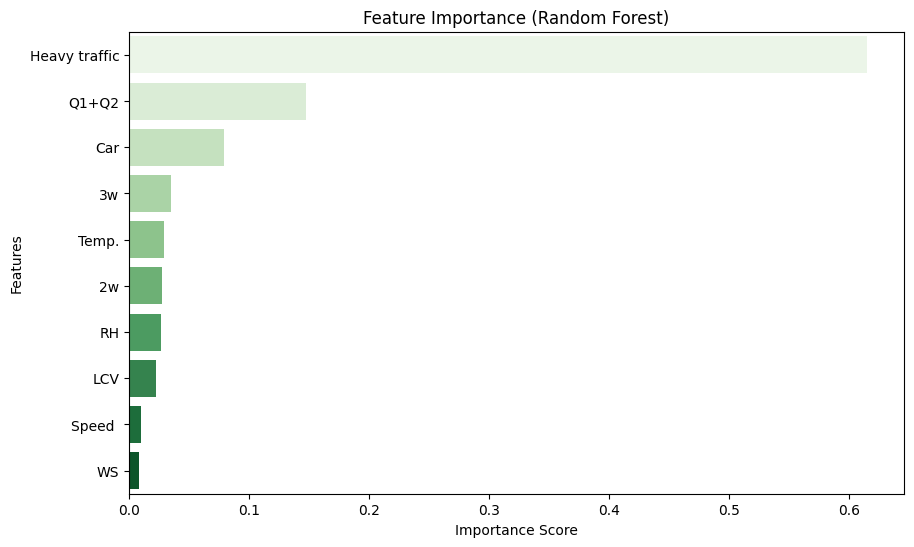

C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_10452\2713558836.py:98: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="black")  # Line of perfect prediction


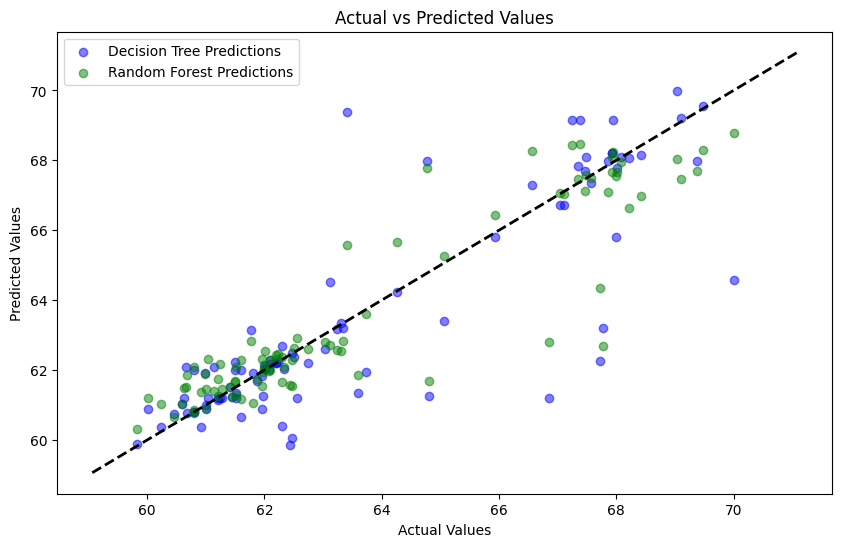

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.metrics import r2_score

# Load the data (replace with your file path)
file_path = "C:/Users/Alok Kumar Pandey/Downloads/Book1 final.xlsx"
data = pd.read_excel(file_path)

# Convert columns with string numbers to proper numeric values
data = data.replace(',', '.', regex=True)  # Replace commas with dots for decimal separation

# Defining the features (all columns except Leq) and target (Leq)
X = data.drop(columns=['Leq', 'L10', 'L50', 'L90', '%HT', 'Median width', 'Shoulder width'])
y = data['L90']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Calculate MSE, MAE, RMSE for Decision Tree
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)

# Feature importance for Decision Tree
feature_importance_dt = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=False)

print("Decision Tree Results:")
print(f"MSE: {mse_dt}, MAE: {mae_dt}, RMSE: {rmse_dt}")
print("Feature Importance (Decision Tree):")
print(feature_importance_dt)

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Calculate MSE, MAE, RMSE for Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

# Feature importance for Random Forest
feature_importance_rf = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

print("\nRandom Forest Results:")
print(f"MSE: {mse_rf}, MAE: {mae_rf}, RMSE: {rmse_rf}")
print("Feature Importance (Random Forest):")
print(feature_importance_rf)

# Calculate R² (Accuracy) for Decision Tree
r2_dt = r2_score(y_test, y_pred_dt)

# Calculate R² (Accuracy) for Random Forest
r2_rf = r2_score(y_test, y_pred_rf)

print("\nAccuracy (R² Scores):")
print(f"Decision Tree R²: {r2_dt}")
print(f"Random Forest R²: {r2_rf}")

# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------- Decision Tree Feature Importance Plot ----------------- #

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_dt, y=feature_importance_dt.index, palette="Blues")
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# ----------------- Random Forest Feature Importance Plot ----------------- #

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_rf, y=feature_importance_rf.index, palette="Greens")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


# ----------------- Actual vs Predicted Plot ----------------- #

# Plot Actual vs Predicted for both models
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, color="blue", alpha=0.5, label="Decision Tree Predictions")
plt.scatter(y_test, y_pred_rf, color="green", alpha=0.5, label="Random Forest Predictions")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="black")  # Line of perfect prediction
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()


Q1+Q2              int64
Speed            float64
Car                int64
2w                 int64
3w                 int64
LCV                int64
Heavy traffic      int64
Temp.            float64
RH                 int64
WS                 int64
dtype: object

XGBoost Results:
MSE: 0.452706314340216, MAE: 0.4289426706271337, RMSE: 0.6728345371190573
Feature Importance (XGBoost):
Heavy traffic    0.687686
Q1+Q2            0.133151
2w               0.039204
3w               0.033565
Car              0.029237
RH               0.023260
LCV              0.017497
Temp.            0.016819
WS               0.014023
Speed            0.005558
dtype: float32

SVM Results:
MSE: 0.5915968411474397, MAE: 0.5979103888610235, RMSE: 0.7691533274630227
Feature Importance (SVM):
Heavy traffic    0.976895
Car              0.516550
2w               0.459286
3w               0.264495
Q1+Q2            0.246489
Temp.            0.168133
WS               0.106002
Speed            0.102245
LCV             

C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_10452\1298868775.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_xgb, y=feature_importance_xgb.index, palette="viridis")


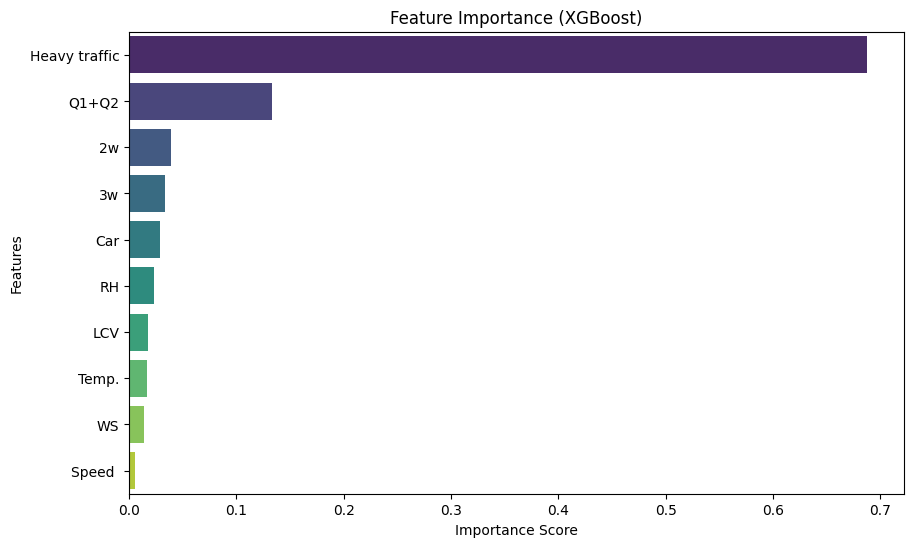

C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_10452\1298868775.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_svm, y=feature_importance_svm.index, palette="magma")


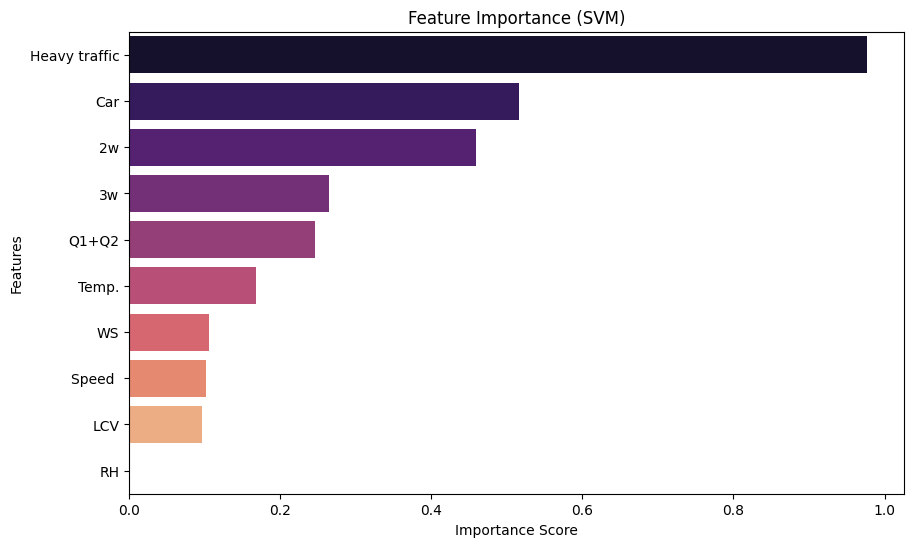

C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_10452\1298868775.py:112: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="black")  # Line of perfect prediction


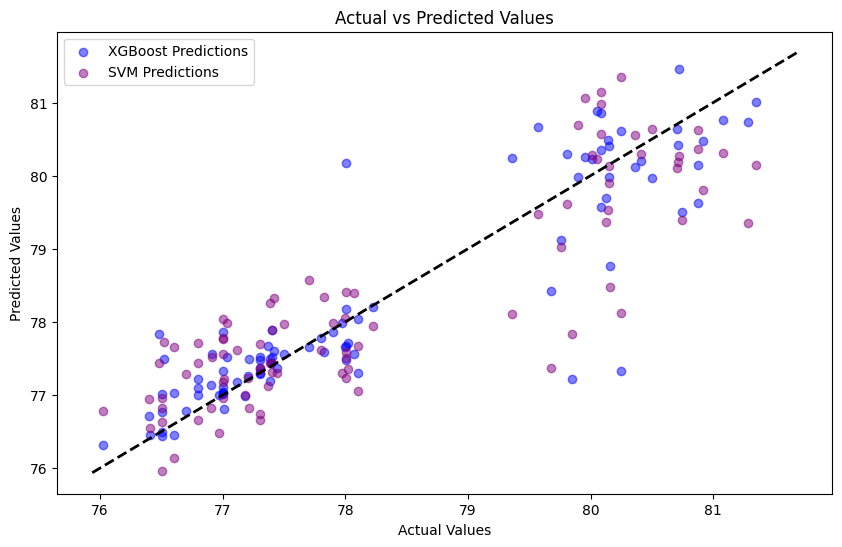

In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (replace with your file path)
file_path = "C:/Users/Alok Kumar Pandey/Downloads/Book1 final.xlsx"
data = pd.read_excel(file_path)

# Convert columns with string numbers to proper numeric values
data = data.replace(',', '.', regex=True)  # Replace commas with dots for decimal separation
data = data.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, replace invalid entries with NaN

# Drop rows with NaN values (if any exist after conversion)
data = data.dropna()

# Define features (X) and target (y)
X = data.drop(columns=['Leq', 'L10', 'L50', 'L90', '%HT', 'Median width', 'Shoulder width'])
y = data['L10']

# Ensure data types are numeric
print(X.dtypes)  # All should be numeric

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------- XGBoost Regressor ----------------- #

# Initialize and train the XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Calculate MSE, MAE, RMSE for XGBoost
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

# Feature importance for XGBoost
feature_importance_xgb = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)

print("\nXGBoost Results:")
print(f"MSE: {mse_xgb}, MAE: {mae_xgb}, RMSE: {rmse_xgb}")
print("Feature Importance (XGBoost):")
print(feature_importance_xgb)

# ----------------- SVM Regressor ----------------- #

# Standardize the data for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVM model with a linear kernel
svm_model = SVR(kernel='linear')
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

# Calculate MSE, MAE, RMSE for SVM
mse_svm = mean_squared_error(y_test, y_pred_svm)
mae_svm = mean_absolute_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)

# Feature importance for SVM (absolute values of coefficients)
feature_importance_svm = pd.Series(abs(svm_model.coef_[0]), index=X.columns).sort_values(ascending=False)

print("\nSVM Results:")
print(f"MSE: {mse_svm}, MAE: {mae_svm}, RMSE: {rmse_svm}")
print("Feature Importance (SVM):")
print(feature_importance_svm)

# Calculate R² (Accuracy) for XGBoost
r2_xgb = r2_score(y_test, y_pred_xgb)

# Calculate R² (Accuracy) for SVM
r2_svm = r2_score(y_test, y_pred_svm)

print("\nAccuracy (R² Scores):")
print(f"XGBoost R²: {r2_xgb}")
print(f"SVM R²: {r2_svm}")

# ----------------- Visualization ----------------- #

# ----------------- XGBoost Feature Importance Plot ----------------- #
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_xgb, y=feature_importance_xgb.index, palette="viridis")
plt.title("Feature Importance (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# ----------------- SVM Feature Importance Plot ----------------- #
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_svm, y=feature_importance_svm.index, palette="magma")
plt.title("Feature Importance (SVM)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# ----------------- Actual vs Predicted Plot ----------------- #
# Plot Actual vs Predicted for both models
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, color="blue", alpha=0.5, label="XGBoost Predictions")
plt.scatter(y_test, y_pred_svm, color="purple", alpha=0.5, label="SVM Predictions")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="black")  # Line of perfect prediction
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()


Q1+Q2              int64
Speed            float64
Car                int64
2w                 int64
3w                 int64
LCV                int64
Heavy traffic      int64
Temp.            float64
RH                 int64
WS                 int64
dtype: object

XGBoost Results:
MSE: 1.6452238844811309, MAE: 0.7917882668420654, RMSE: 1.2826628101263133
Feature Importance (XGBoost):
Heavy traffic    0.662947
Q1+Q2            0.121765
3w               0.078208
RH               0.048287
WS               0.021194
Car              0.019369
LCV              0.015747
Temp.            0.015699
2w               0.011996
Speed            0.004787
dtype: float32

SVM Results:
MSE: 2.2820745943445555, MAE: 1.1451553523629334, RMSE: 1.5106536976900284
Feature Importance (SVM):
Heavy traffic    1.670709
Car              0.801974
2w               0.559111
3w               0.400252
Temp.            0.199759
RH               0.103147
Speed            0.037515
LCV              0.024332
Q1+Q2          

C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_10452\1924777282.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_xgb, y=feature_importance_xgb.index, palette="viridis")


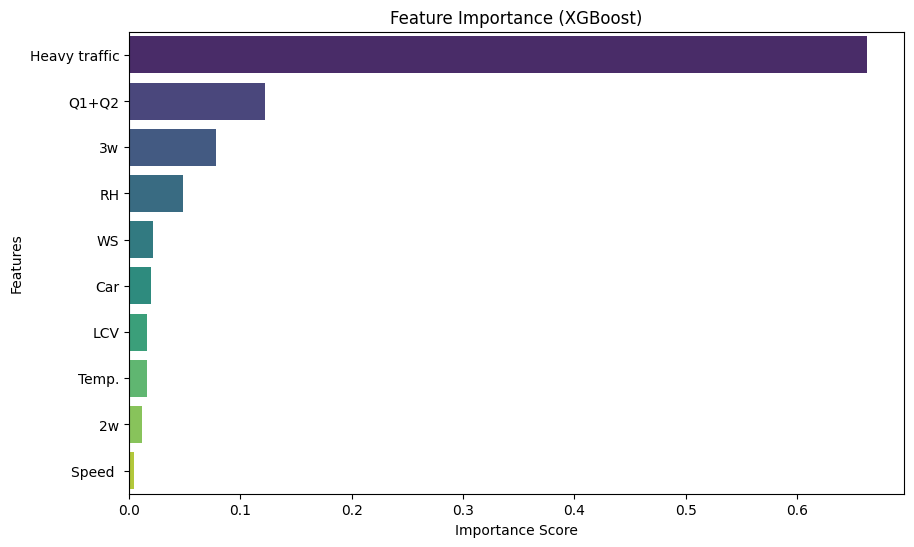

C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_10452\1924777282.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_svm, y=feature_importance_svm.index, palette="magma")


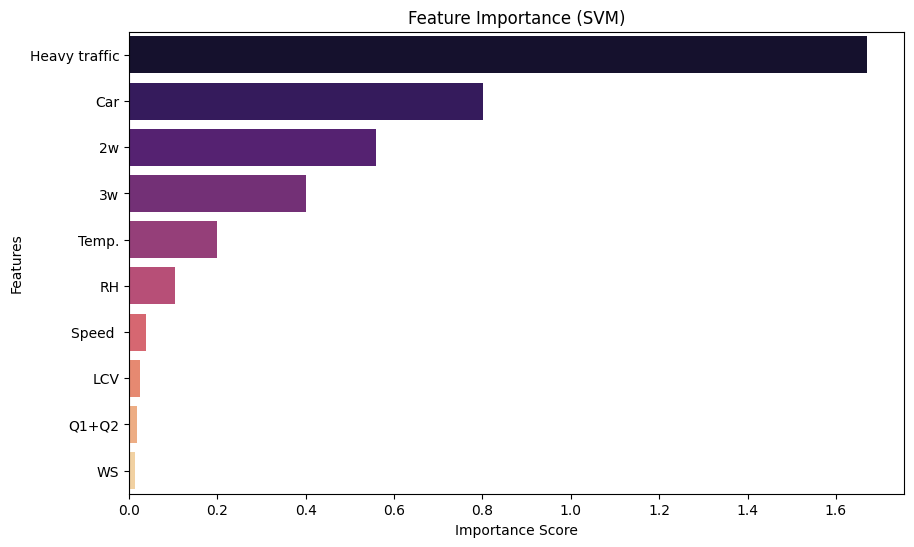

C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_10452\1924777282.py:112: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="black")  # Line of perfect prediction


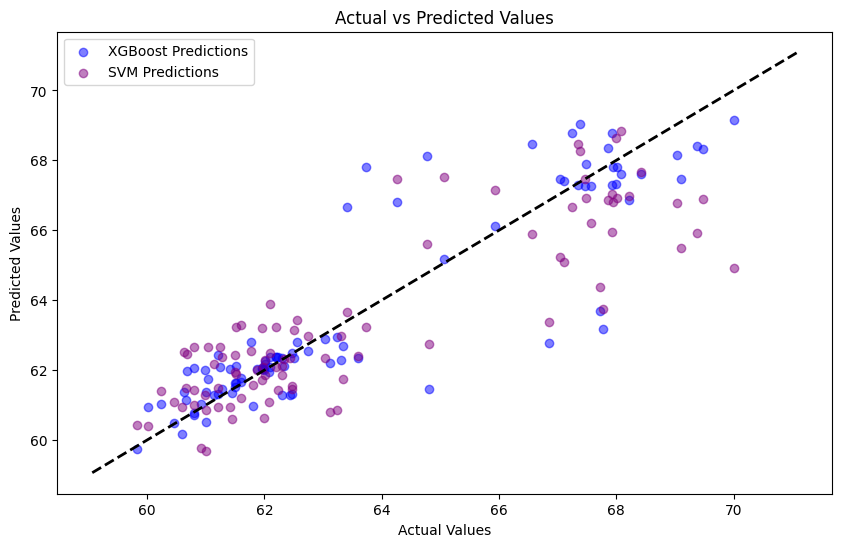

In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (replace with your file path)
file_path = "C:/Users/Alok Kumar Pandey/Downloads/Book1 final.xlsx"
data = pd.read_excel(file_path)

# Convert columns with string numbers to proper numeric values
data = data.replace(',', '.', regex=True)  # Replace commas with dots for decimal separation
data = data.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, replace invalid entries with NaN

# Drop rows with NaN values (if any exist after conversion)
data = data.dropna()

# Define features (X) and target (y)
X = data.drop(columns=['Leq', 'L10', 'L50', 'L90', '%HT', 'Median width', 'Shoulder width'])
y = data['L90']

# Ensure data types are numeric
print(X.dtypes)  # All should be numeric

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------- XGBoost Regressor ----------------- #

# Initialize and train the XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Calculate MSE, MAE, RMSE for XGBoost
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

# Feature importance for XGBoost
feature_importance_xgb = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)

print("\nXGBoost Results:")
print(f"MSE: {mse_xgb}, MAE: {mae_xgb}, RMSE: {rmse_xgb}")
print("Feature Importance (XGBoost):")
print(feature_importance_xgb)

# ----------------- SVM Regressor ----------------- #

# Standardize the data for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVM model with a linear kernel
svm_model = SVR(kernel='linear')
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

# Calculate MSE, MAE, RMSE for SVM
mse_svm = mean_squared_error(y_test, y_pred_svm)
mae_svm = mean_absolute_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)

# Feature importance for SVM (absolute values of coefficients)
feature_importance_svm = pd.Series(abs(svm_model.coef_[0]), index=X.columns).sort_values(ascending=False)

print("\nSVM Results:")
print(f"MSE: {mse_svm}, MAE: {mae_svm}, RMSE: {rmse_svm}")
print("Feature Importance (SVM):")
print(feature_importance_svm)

# Calculate R² (Accuracy) for XGBoost
r2_xgb = r2_score(y_test, y_pred_xgb)

# Calculate R² (Accuracy) for SVM
r2_svm = r2_score(y_test, y_pred_svm)

print("\nAccuracy (R² Scores):")
print(f"XGBoost R²: {r2_xgb}")
print(f"SVM R²: {r2_svm}")

# ----------------- Visualization ----------------- #

# ----------------- XGBoost Feature Importance Plot ----------------- #
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_xgb, y=feature_importance_xgb.index, palette="viridis")
plt.title("Feature Importance (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# ----------------- SVM Feature Importance Plot ----------------- #
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_svm, y=feature_importance_svm.index, palette="magma")
plt.title("Feature Importance (SVM)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# ----------------- Actual vs Predicted Plot ----------------- #
# Plot Actual vs Predicted for both models
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, color="blue", alpha=0.5, label="XGBoost Predictions")
plt.scatter(y_test, y_pred_svm, color="purple", alpha=0.5, label="SVM Predictions")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="black")  # Line of perfect prediction
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()
